In [1]:
import os
import cv2
import dlib
import keras
import tensorflow as tf
from keras import backend 
import numpy as np
import preprocess
import firstCNN
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
import matplotlib.pyplot as plt
from tensorflow.keras import  layers, models

In [2]:
folder = '/Users/kristshingjergji/Desktop/images_datasets/CK+/'

In [3]:
participants = os.listdir(folder + 'cohn-kanade-images/')
participants.sort()
print(f'Choose a subject among the following {(len(participants)-1)} subjects:') 

print(participants)
person = input()
print(f'Choose session for subject {person}') 
session = input()

Choose a subject among the following 123 subjects:
['.DS_Store', 'S005', 'S010', 'S011', 'S014', 'S022', 'S026', 'S028', 'S029', 'S032', 'S034', 'S035', 'S037', 'S042', 'S044', 'S045', 'S046', 'S050', 'S051', 'S052', 'S053', 'S054', 'S055', 'S056', 'S057', 'S058', 'S059', 'S060', 'S061', 'S062', 'S063', 'S064', 'S065', 'S066', 'S067', 'S068', 'S069', 'S070', 'S071', 'S072', 'S073', 'S074', 'S075', 'S076', 'S077', 'S078', 'S079', 'S080', 'S081', 'S082', 'S083', 'S084', 'S085', 'S086', 'S087', 'S088', 'S089', 'S090', 'S091', 'S092', 'S093', 'S094', 'S095', 'S096', 'S097', 'S098', 'S099', 'S100', 'S101', 'S102', 'S103', 'S104', 'S105', 'S106', 'S107', 'S108', 'S109', 'S110', 'S111', 'S112', 'S113', 'S114', 'S115', 'S116', 'S117', 'S118', 'S119', 'S120', 'S121', 'S122', 'S124', 'S125', 'S126', 'S127', 'S128', 'S129', 'S130', 'S131', 'S132', 'S133', 'S134', 'S135', 'S136', 'S137', 'S138', 'S139', 'S147', 'S148', 'S149', 'S151', 'S154', 'S155', 'S156', 'S157', 'S158', 'S160', 'S501', 'S502',

 S999


Choose session for subject S999


 001


In [4]:
AU, landmarks, image, imageLand = preprocess.landmarks_AU_CK(person, session, folder)

In [6]:
## Preprocessing 
# 1. Align using landmarks of eyes
image_aligned, landmarks_aligned = preprocess.alignFromLandmarks(image, landmarks)
# 2. Crop image and resize 
rect = preprocess.detectFace(image_aligned,predictor)
croppedResizedImage, croppedResizedLandmarks = preprocess.cropResize(image_aligned, rect, 96, landmarks_aligned)
# 3. Use grayscale
finalImage = cv2.cvtColor(croppedResizedImage, cv2.COLOR_BGR2GRAY)

NameError: name 'predictor' is not defined

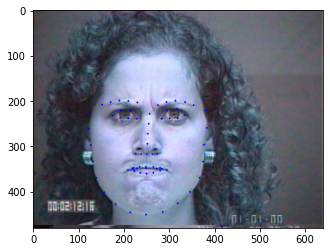

In [7]:
# First
image_ = image.copy()
for (x, y) in landmarks:
    cv2.circle(image_, (int(x), int(y)), 2, (0, 0, 255), -1)
plt.imshow(image_)

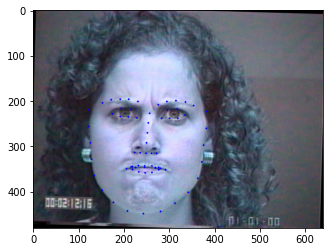

In [8]:
# Second
image_aligned_ = image_aligned.copy()
for (x, y) in landmarks_aligned:
    cv2.circle(image_aligned_, (int(x), int(y)), 2, (0, 0, 255), -1)
plt.imshow(image_aligned_)

In [9]:
# Third
croppedResizedImage_ = croppedResizedImage.copy()
for (x, y) in croppedResizedLandmarks:
    cv2.circle(croppedResizedImage_, (int(x), int(y)), 1, (0, 0, 255), -1)
plt.imshow(croppedResizedImage_)

NameError: name 'croppedResizedImage' is not defined

In [ ]:
AUlabels = preprocess.labelsetCK(AU)

In [ ]:
AUlabels

In [ ]:
participants.remove('.DS_Store')

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:

model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(96, 96, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(96, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(39, activation='sigmoid'))


In [ ]:
dictionary = {'metric' :multi.fbeta}

In [ ]:
fbeta = multi.fbeta

In [ ]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

In [ ]:
model.save("my_model.h5")

In [ ]:
from keras.models import load_model

In [ ]:
from tensorflow.python.keras.saving.saved_model import load as saved_model_load

In [ ]:
model2 = load_model('my_model.h5', custom_objects={'fbeta': multi.fbeta})

In [ ]:
AUNew, landmarksNew, imageNew, imageLandNew = preprocess.landmarks_AU_CK('S999', '001', folder)
image_alignedNew, landmarks_alignedNew = preprocess.alignFromLandmarks(imageNew, landmarksNew)
rectNew = preprocess.detectFace (image_alignedNew)
croppedResizedImage = preprocess.cropResizeImage(image, rectNew, 96)


In [ ]:
plt.imshow(croppedResizedImage)

In [ ]:
croppedResizedImage.shape

In [ ]:
plt.imshow(train_images[0])

In [ ]:
train_images[0].shape

In [ ]:
labels_pred = model2.predict(example)

In [ ]:
example = tf.expand_dims(train_images[0], 0)